## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [417]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

##Load Data

In [418]:
#import data
import pandas as pd

df=pd.read_excel('titanic.xlsx')
data = df.copy()

##Preliminary

In [419]:
# Menampilkan 5 data teratas
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [420]:
# Menampilkan 5 data terbawah
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [421]:
# Menampilkan 5 random sampel dari data
data.sample(5)

,survived,name,sex,age
256,1,"Salomon, Mr. Abraham L",male,NaN
363,1,"Cameron, Miss. Clear Annie",female,35.0
289,1,"Taussig, Miss. Ruth",female,18.0
418,0,"Gavey, Mr. Lawrence",male,26.0
450,1,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0


In [422]:
#Menampilkan info dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


##Statistical Summary





In [423]:
#Melihat kolom apa saja yang ada pada excel
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [424]:
#Mengelompokkan data jenis kategori dan numerik
categoricals=['name','sex']
numericals=['survived','age']

In [425]:
#Menampilkan statistical summary dari data numerik
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


In [426]:
#Menampilkan categorical summary dari data kategori
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


In [427]:
#Menampilkan detail dari data numerik
for col in numericals:
  print(data[col].value_counts())

survived
1    270
0    230
Name: count, dtype: int64
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     1
45.5000     1
13.0000     1
67.00

In [428]:
#Menampilkan detail dari data kategori
for col in categoricals:
  print(data[col].value_counts())

name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1
Bailey, Mr. Percy Andrew   

##Data Cleansing

Duplicated Data

In [429]:
len(data)

500

In [430]:
# Memeriksa apakah ada duplikasi
print(df.duplicated().sum())

1


In [431]:
duplicates=data[data.duplicated(keep=False)]
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [432]:
# Menghapus baris duplikasi
df = df.drop_duplicates()

In [433]:
# Memastikan duplikasi telah dihapus
print(df.duplicated().sum())

0


Handling Duplicates

In [434]:
dup_count = duplicates.groupby(list(data.columns)).size().reset_index(name = "duplicates count")

sorted_duplicates=dup_count.sort_values(by = ['duplicates count'], ascending = False)

sorted_duplicates

,survived,name,sex,age,duplicates count
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [435]:
data = data.drop_duplicates()

len(data)

499

Null Values

In [436]:
#Melihat Jumlah Value null untuk setiap kolom
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


Fill Null Values

In [437]:
print(data['age'].dtype)
print(data['age'].median())

float64
35.0


In [438]:
#  Mengisi nilai yang hilang dengan median

for column in data.select_dtypes(include=['number']).columns:
    data[column] = data[column].fillna(data[column].median())


In [439]:
# Menghapus baris dengan nilai yang hilang
df = df.dropna()

In [440]:
# - Menghapus kolom dengan nilai yang hilang
df = df.dropna(axis=1)

In [441]:
#Melihat Jumlah Value null untuk setiap kolom
data.isna().sum()

,0
survived,0
name,0
sex,0
age,0


##Info Data Final

In [442]:
#Menampilkan info data setelah proses handling duplicates
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


##VISUALISASI DATA

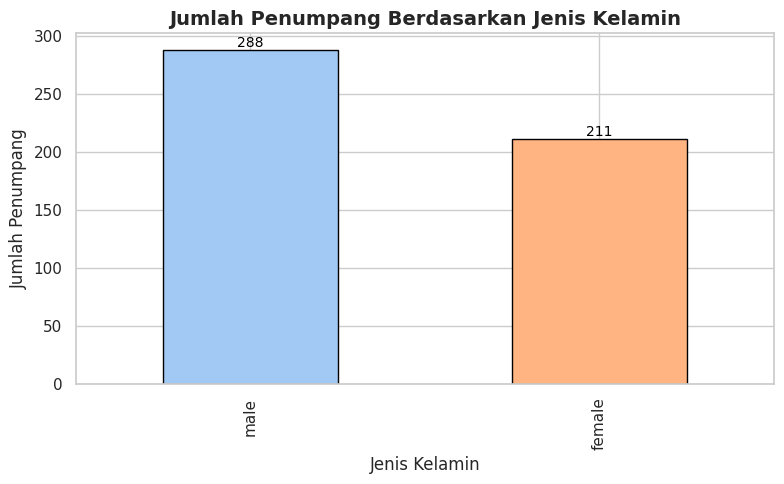

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = data['sex'].value_counts().plot( kind='bar', color=sns.color_palette("pastel"),edgecolor='black')
plt.title("Jumlah Penumpang Berdasarkan Jenis Kelamin", fontsize=14, fontweight='bold')
plt.xlabel("Jenis Kelamin", fontsize=12)
plt.ylabel("Jumlah Penumpang", fontsize=12)
for bar in ax.patches:ax.annotate(f'{bar.get_height()}',(bar.get_x() + bar.get_width() / 2, bar.get_height()),ha='center',va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

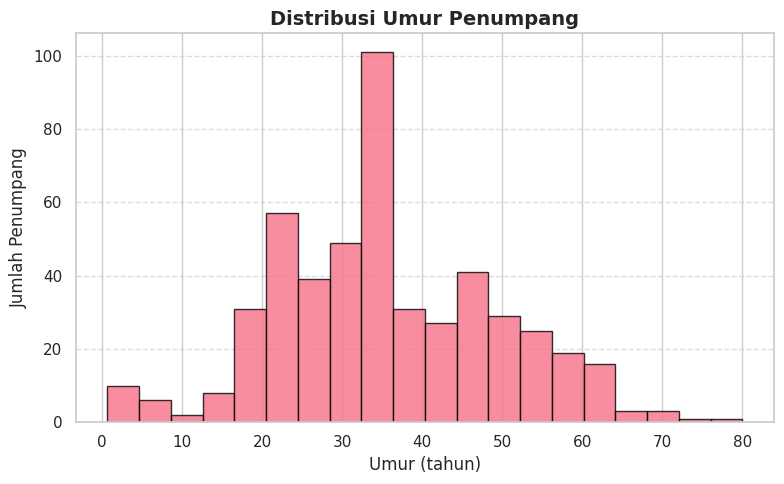

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
plt.hist(data['age'], bins=20, color=sns.color_palette("husl", 1)[0], edgecolor='black', alpha=0.8)
plt.title("Distribusi Umur Penumpang", fontsize=14, fontweight='bold')
plt.xlabel("Umur (tahun)", fontsize=12)
plt.ylabel("Jumlah Penumpang", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

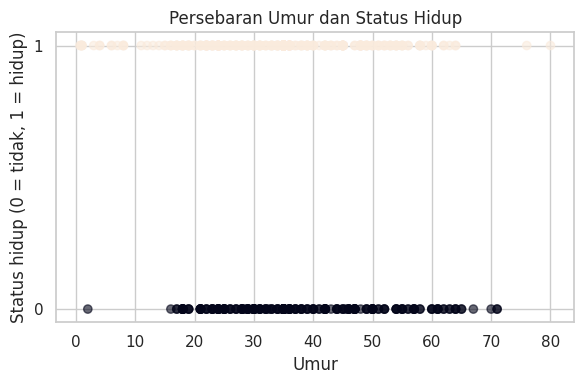

In [445]:
plt.figure(figsize=(6,4))
plt.scatter(data['age'], data['survived'], alpha= 0.6, c=data['survived'])
plt.title("Persebaran Umur dan Status Hidup")
plt.xlabel("Umur")
plt.ylabel("Status hidup (0 = tidak, 1 = hidup)")
plt.yticks([0,1])
plt.tight_layout()
plt.show()

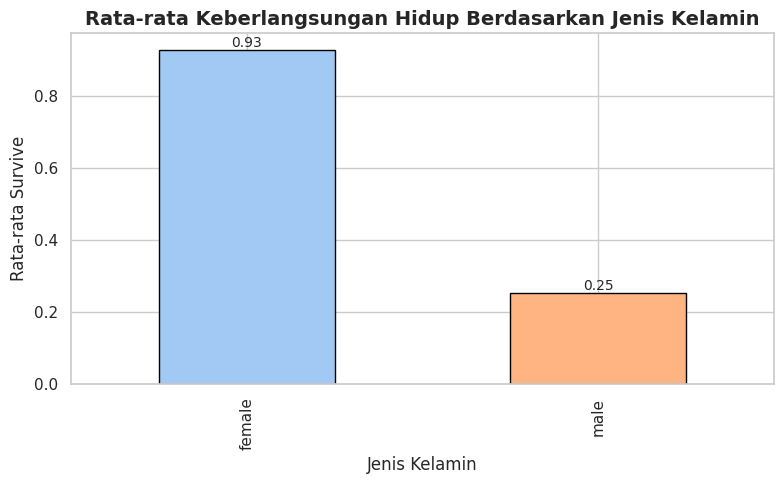

In [446]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = data.groupby('sex')['survived'].mean().plot(
    kind='bar',
    color=sns.color_palette("pastel"),
    edgecolor='black'
)
plt.title("Rata-rata Keberlangsungan Hidup Berdasarkan Jenis Kelamin", fontsize=14, fontweight='bold')
plt.xlabel("Jenis Kelamin", fontsize=12)
plt.ylabel("Rata-rata Survive", fontsize=12)
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.2f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [447]:
# Menyimpan data ke file CSV
df.to_csv('hasil_analisis_titanic.csv', index=False)


In [448]:
# Menyimpan data ke file Excel
df.to_excel('hasil_analisis_titanic.xlsx', index=False)